In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data initilizaton

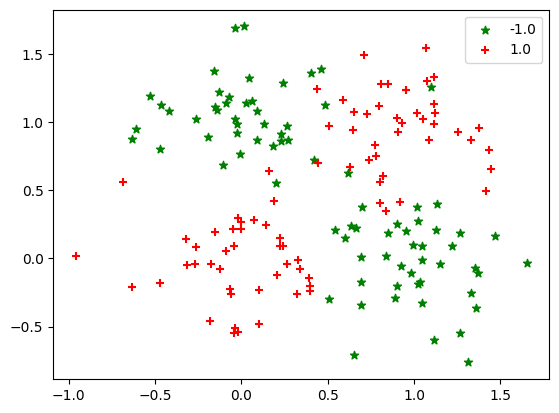

In [2]:
SIGMA = 0.29
POINT_NUM = 40

def createDataSet():
    x0_0 = np.random.normal((0,1), SIGMA, (POINT_NUM,2))
    x0_1 = np.random.normal((1,0), SIGMA, (POINT_NUM,2))
    x1_0 = np.random.normal((0,0), SIGMA, (POINT_NUM,2))
    x1_1 = np.random.normal((1,1), SIGMA, (POINT_NUM,2))

    x0 = np.concatenate([x0_0, x0_1])
    x1 = np.concatenate([x1_0, x1_1])
    
    X = np.concatenate([x0, x1])
    y = np.zeros(POINT_NUM*4)
    y[:POINT_NUM*2] = -1
    y[POINT_NUM*2:] = 1
    
    return X, y

Xtraining, ytraining = createDataSet()
Xtest, ytest = createDataSet()

plt.scatter(Xtraining[:POINT_NUM*2, 0], Xtraining[:POINT_NUM*2, 1], color='g', marker="*", label=f'{ytraining[0]}')
plt.scatter(Xtraining[POINT_NUM*2:, 0], Xtraining[POINT_NUM*2:, 1], color='r', marker="+", label=f'{ytraining[-1]}')
_ = plt.legend()

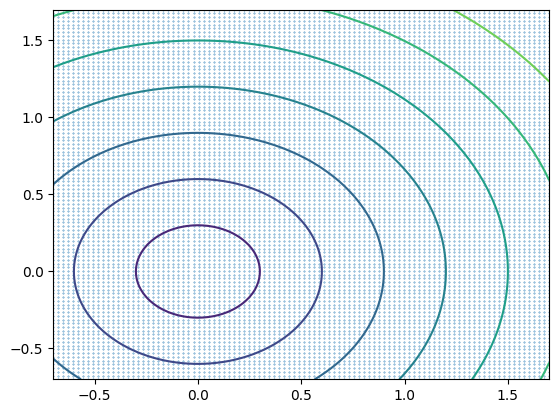

In [3]:
def createPoints(resolution):
    a = np.linspace(-0.7, 1.7, resolution)
    xx, yy = np.meshgrid(a,a)
    return xx, yy, np.column_stack([xx.ravel(), yy.ravel()])

resolution = 100
xx, yy, points = createPoints(resolution)

plt.contour(xx, yy, np.linalg.norm(points, axis=1).reshape(resolution, resolution))
plt.scatter(points[:, 0], points[:, 1], s=0.1)

# SVM

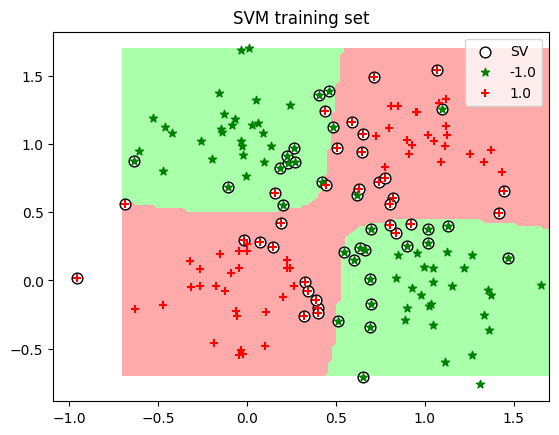

In [10]:
def plotContour(xx, yy, result, sv, X, y, title):
    
    mycolors = colors.ListedColormap(['#AAFFAA', '#FFAAAA'])
    plt.contourf(xx, yy, result, cmap=mycolors)
    
    plt.scatter(sv[:,0], sv[:,1], color='white', edgecolor='black', marker="o", s=60, label='SV')
    plt.scatter(X[:POINT_NUM*2,0], X[:POINT_NUM*2,1], color='g', label=f'{y[0]}', marker="*")
    plt.scatter(X[POINT_NUM*2:,0], X[POINT_NUM*2:,1], color='r', label=f'{y[-1]}', marker="+")
    
    plt.legend()
    plt.title(title)
    plt.show()

def predictAndPlot(points, resolution, xx, yy, clf, Xtraining, ytraining, title):
    p = clf.predict(points)
    p = p.reshape([resolution, resolution])
    plotContour(xx, yy, p, clf.support_vectors_, Xtraining, ytraining, title)
    
    
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(Xtraining, ytraining)

predictAndPlot(points, resolution, xx, yy, clf, Xtraining, ytraining, "SVM training set")

In [5]:
wptraining = (clf.predict(Xtraining) != ytraining).sum() * 100 / len(ytraining)
wptest = (clf.predict(Xtest) != ytest).sum() * 100 / len(ytest)
print(f'There is {wptraining}% of wrong predicitions on the training set')
print(f'There is {wptest}% of wrong predicitions on the test set')

There is 8.75% of wrong predicitions on the training set
There is 10.625% of wrong predicitions on the test set


# Excercise H9.3 C-SVM parameter optimizaton

In [6]:
parameters = {
    'kernel': ['rbf'],
    'C': 2 ** np.arange(-6, 10.1, step=1),
    'gamma': 2 ** np.arange(-5, 9.1, step=1) 
}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(Xtraining, ytraining)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.5625e-02, 3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01,
       5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00,
       1.6000e+01, 3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02,
       5.1200e+02, 1.0240e+03]),
                         'gamma': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 6.400e+01,
       1.280e+02, 2.560e+02, 5.120e+02]),
                         'kernel': ['rbf']})

In [7]:
gridc = clf.cv_results_['param_C']
gridc = gridc.reshape(parameters['C'].shape[0], -1)

gridgamma = clf.cv_results_['param_gamma']
gridgamma = gridgamma.reshape(parameters['C'].shape[0], -1)

gridtestscore = clf.cv_results_['mean_test_score']
gridtestscore = gridtestscore.reshape(parameters['C'].shape[0], -1)

gridstd = clf.cv_results_['mean_test_score']
gridstd = gridstd.reshape(parameters['C'].shape[0], -1)

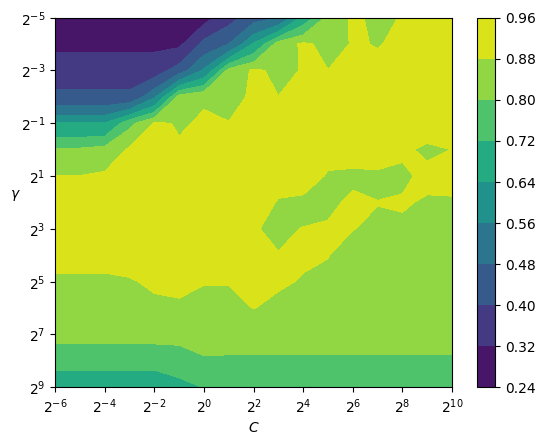

In [20]:
plt.contourf(gridc, gridgamma, gridtestscore)

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.gca().invert_yaxis()

plt.xlabel("$C$", rotation='horizontal')
plt.ylabel("$\gamma$", rotation='horizontal')

plt.colorbar()

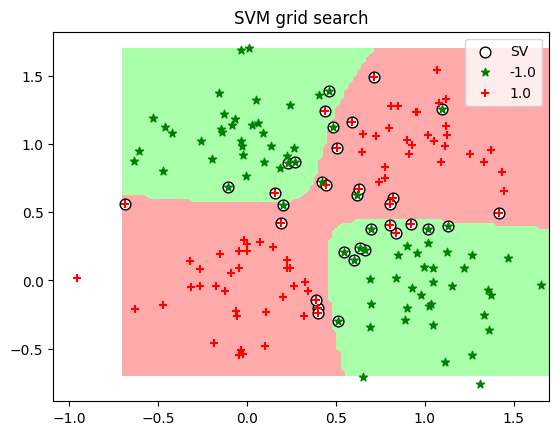

There is 6.25% of wrong predicitions on the training set
There is 10.0% of wrong predicitions on the test set


In [9]:
predictAndPlot(points, resolution, xx, yy, clf.best_estimator_, Xtraining, ytraining, "SVM grid search")

wptraining = (clf.best_estimator_.predict(Xtraining) != ytraining).sum() * 100 / len(ytraining)
wptest = (clf.best_estimator_.predict(Xtest) != ytest).sum() * 100 / len(ytest)
print(f'There is {wptraining}% of wrong predicitions on the training set')
print(f'There is {wptest}% of wrong predicitions on the test set')